In [1]:
# En este trabajo lo que se buscara es ver cual es la causa mas probable por la que una accion cotize mas alto que su valor
# en libros.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

In [3]:
df = pd.read_csv("financiero.csv")
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
headers = ["Ticker", "Empresa", "Sector" , "Precio", "Margen", "Rendimiento de dividendos", "Beneficio/Acciones", "Bajo Semanal" , "Alto Semanal" , "Capitalización", "EBITDA", "Precio/Vtas", "Precio/Libro", "Web"]
df.columns = headers
# Traducir los titulos para un mejor entendimiento

In [5]:
df.head (5)

,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Bajo Semanal,Alto Semanal,Capitalización,EBITDA,Precio/Vtas,Precio/Libro,Web
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [6]:
df.dtypes # Analizando la base de datos y su composición.

Ticker                        object
Empresa                       object
Sector                        object
Precio                       float64
Margen                       float64
Rendimiento de dividendos    float64
Beneficio/Acciones           float64
Bajo Semanal                 float64
Alto Semanal                 float64
Capitalización               float64
EBITDA                       float64
Precio/Vtas                  float64
Precio/Libro                 float64
Web                           object
dtype: object

In [7]:
df.describe (include = "all") # Para ver estadisticas basicas de la base de datos.

,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Bajo Semanal,Alto Semanal,Capitalización,EBITDA,Precio/Vtas,Precio/Libro,Web
count,505,505,505,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000,505
unique,505,505,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505
top,GD,SCANA Corp,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
freq,1,1,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179,NaN
std,NaN,NaN,NaN,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508,NaN
min,NaN,NaN,NaN,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000,NaN
25%,NaN,NaN,NaN,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000,NaN
50%,NaN,NaN,NaN,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000,NaN
75%,NaN,NaN,NaN,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000,NaN


In [8]:
# Preprocesamos los datos para poder analizarlos

In [9]:
# Hacemos este chequeo para ver si hay algun valor NAN en el dataframe, si sale TRUE quiere decir que si hay al menos un valor
# NAN y deberemos verificar como resolverlo tambien.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

True


In [10]:
missing_data = df.isnull()
missing_data.head(5) # La salida es un valor booleano que indica si el valor que se consulta en el argumento es en realidad
# un dato que falta. En este caso FALSE indica que el valor no es un valor perdido o NAN.

,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Bajo Semanal,Alto Semanal,Capitalización,EBITDA,Precio/Vtas,Precio/Libro,Web
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum() # Asi vemos mas sencillamente cuantos valores faltan en cada columna

Ticker                       0
Empresa                      0
Sector                       0
Precio                       0
Margen                       2
Rendimiento de dividendos    0
Beneficio/Acciones           0
Bajo Semanal                 0
Alto Semanal                 0
Capitalización               0
EBITDA                       0
Precio/Vtas                  0
Precio/Libro                 8
Web                          0
dtype: int64

In [12]:
# Nos podemos ahorrar toda la exploración de los valores NAN anterior con esta formula, nos dara las filas y columnas con estos
# valores.

null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head())

     Margen  Precio/Libro
55    20.21           NaN
199    9.50           NaN
225   14.07           NaN
292  -32.00           NaN
346  195.63           NaN


In [13]:
df = df.fillna(df.mean()) # Aqui lo que hacemos es rellenar los NAN con promedios de la columna en cuestión.

In [14]:
# Ahora vemos que nos trae el booleano FALSE porque ya no hay mas valores NAN en el dataframe y podemos seguir trabajando.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [15]:
# Eliminamos la ultima columna que nos detalla las paginas web de cada empresa, porque no sirve para el analisis y las columnas
# Bajo y Alto semanal por el mismo motivo.
del df['Web']
del df['Bajo Semanal']
del df['Alto Semanal']


In [16]:
# Normalización de algunos datos: Columnas de capitalización y EBITDA para ser mas facil de procesar y entender.

In [17]:
# A la columna Capitalización la normalizo utilizando el metodo simple: Xnew=Xold/Xmax
df ["Capitalización"] = df ["Capitalización"] / df ["Capitalización"].max()

In [18]:
# A la columna EBITDA la normalizo utilizando el metodo z-score por simple motivo de exposición.
df ["EBITDA"] = (df ["EBITDA"] - df ["EBITDA"].mean()) / df ["EBITDA"].std()

In [19]:
df


,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Capitalización,EBITDA,Precio/Vtas,Precio/Libro
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,0.171365,0.797842,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,0.013321,-0.437002,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,0.126152,0.314839,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,0.224070,0.982330,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,0.122007,0.300108,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,0.015954,-0.419313,2.726209,5.31
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,0.033358,-0.190238,6.313636,212.08
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,0.030209,-0.231404,3.164895,2.39
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,0.013182,-0.524860,3.794579,1.42


In [20]:
# Aplicando estadisticas al dataframe

In [21]:
df.corr() # Para plasmar todas las correlaciones que hay entre las variables

,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Capitalización,EBITDA,Precio/Vtas,Precio/Libro
Precio,1.000000,0.194725,-0.244630,0.591061,0.406474,0.180321,0.181625,0.023570
Margen,0.194725,1.000000,-0.180951,0.004425,0.131339,0.002948,0.188553,0.000357
Rendimiento de dividendos,-0.244630,-0.180951,1.000000,-0.077235,-0.021794,0.126133,-0.077724,0.088885
Beneficio/Acciones,0.591061,0.004425,-0.077235,1.000000,0.194063,0.180583,-0.036178,0.032059
Capitalización,0.406474,0.131339,-0.021794,0.194063,1.000000,0.771344,0.095249,0.034321
EBITDA,0.180321,0.002948,0.126133,0.180583,0.771344,1.000000,-0.037175,0.035419
Precio/Vtas,0.181625,0.188553,-0.077724,-0.036178,0.095249,-0.037175,1.000000,0.012303
Precio/Libro,0.023570,0.000357,0.088885,0.032059,0.034321,0.035419,0.012303,1.000000


Text(0.5, 1.0, 'Relación entre el Precio y la Capitalización')

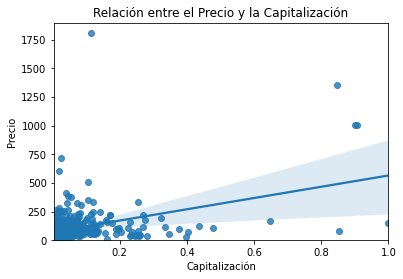

In [22]:
sns.regplot(x="Capitalización", y="Precio", data=df)
plt.ylim(0,)
plt.title("Relación entre el Precio y la Capitalización")

Text(0.5, 1.0, 'Relación entre el Precio y el Margen')

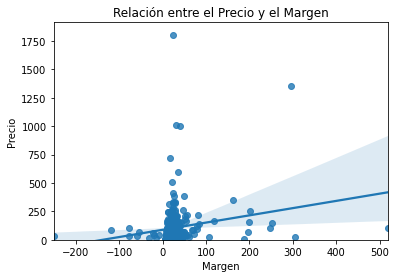

In [23]:
sns.regplot(x="Margen", y="Precio", data=df)
plt.ylim(0,)
plt.title("Relación entre el Precio y el Margen")

Text(0.5, 1.0, 'Relación entre el Precio y el Beneficio sobre Acciones')

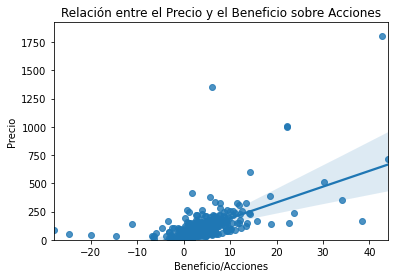

In [24]:
sns.regplot(x="Beneficio/Acciones", y="Precio", data=df)
plt.ylim(0,)
plt.title("Relación entre el Precio y el Beneficio sobre Acciones")

Text(0.5, 1.0, 'Relación entre el Precio y el Rendimiento de los dividendos')

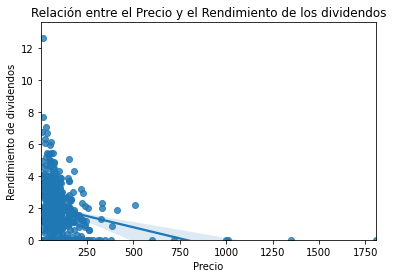

In [25]:
sns.regplot(x="Precio", y="Rendimiento de dividendos", data=df)
plt.ylim(0,)

plt.title("Relación entre el Precio y el Rendimiento de los dividendos")


In [28]:
pearson_coef, p_value = stats.pearsonr(df['Beneficio/Acciones'], df['Precio'])
print("El coeficiente de Pearson es", pearson_coef, " y tiene un P-value de P =", p_value)  

El coeficiente de Pearson es 0.5910611927275288  y tiene un P-value de P = 6.824025084865023e-49


In [29]:
pearson_coef, p_value = stats.pearsonr(df['Rendimiento de dividendos'], df['Precio'])
print("El coeficiente de Pearson es", pearson_coef, " y tiene un P-value de P =", p_value)  

El coeficiente de Pearson es -0.24462964683744529  y tiene un P-value de P = 2.5683496427792175e-08
